In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import scipy.optimize as opt
from scipy.optimize import curve_fit
from fbprophet import Prophet
import datetime
from sklearn import metrics

In [66]:
#cleaning data and merging 
covid = pd.read_csv("COVID19-death-US.csv", parse_dates = ['date'])
overall = pd.read_csv('overall.csv', parse_dates = ['post_date'])
result = covid.merge(overall, how='left', left_on='date', right_on='post_date')
result2 = covid.merge(overall, left_on='date', right_on='post_date')
industry = pd.read_csv('industry.csv', parse_dates = ['post_date'],encoding='ISO-8859-1')
jobfam = pd.read_csv('job_family.csv', parse_dates = ['post_date'],encoding='ISO-8859-1')
geo = pd.read_csv('geography.csv', parse_dates = ['post_date'],encoding='ISO-8859-1')

In [67]:
result

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,post_date,count_id_indexed
0,USA,North America,United States,2020-01-22,1,NaN,NaN,NaN,NaN,NaN,0.003,NaT,NaN
1,USA,North America,United States,2020-01-23,1,0.0,NaN,NaN,NaN,NaN,0.003,NaT,NaN
2,USA,North America,United States,2020-01-24,2,1.0,NaN,NaN,NaN,NaN,0.006,NaT,NaN
3,USA,North America,United States,2020-01-25,2,0.0,NaN,NaN,NaN,NaN,0.006,NaT,NaN
4,USA,North America,United States,2020-01-26,5,3.0,NaN,NaN,NaN,NaN,0.015,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,USA,North America,United States,2021-05-06,32604810,47366.0,45108.714,580148.0,789.0,668.714,98503.170,NaT,NaN
471,USA,North America,United States,2021-05-07,32651865,47055.0,43556.286,580901.0,753.0,671.857,98645.329,NaT,NaN
472,USA,North America,United States,2021-05-08,32686358,34493.0,42012.000,581516.0,615.0,659.143,98749.537,NaT,NaN
473,USA,North America,United States,2021-05-09,32707750,21392.0,40872.714,581754.0,238.0,646.857,98814.164,NaT,NaN


In [68]:
result_after =result[result["date"]>'2020-12-11']
train=result_after






5049##### train

In [69]:
x = range(len(train['date']))
y = train['new_cases']
y=train['new_cases']
y_=train['new_deaths']
x_ = np.arange(0, 350, 1).tolist()
p0 = [max(y), 0.0,max(x)]
p0_ = [max(y_), 0.0,max(x)]


In [75]:
def logistic(xs, L, k, x_0):
    result = []
    
    for x in xs:
        xp = k*(x-x_0)
        if xp >= 0:
            result.append(L / ( 1. + np.exp(-xp) ) )
        else:
            result.append(L * np.exp(xp) / ( 1. + np.exp(xp) ) )
    return result
try:
    popt, pcov = opt.curve_fit(logistic, x, y,p0)
    yfit = logistic(x_, *popt)
    popt_, pcov_ = opt.curve_fit(logistic, x, y_,p0_)
    yfit_ = logistic(x_, *popt_)
except:
    popt, pcov = opt.curve_fit(f, x, y, method="lm", maxfev=10000)
    yfit = f(x_, *popt)
    popt_, pcov_ = opt.curve_fit(f, x, y_, method="lm", maxfev=10000)
    yfit_ = f(x_, *popt_)


In [71]:
date1 = [datetime.date(2020, 12, 11)+ datetime.timedelta(days=i) for i in range(len(x))]
date2=[datetime.date(2020, 12, 11)+ datetime.timedelta(days=i) for i in range(350)]

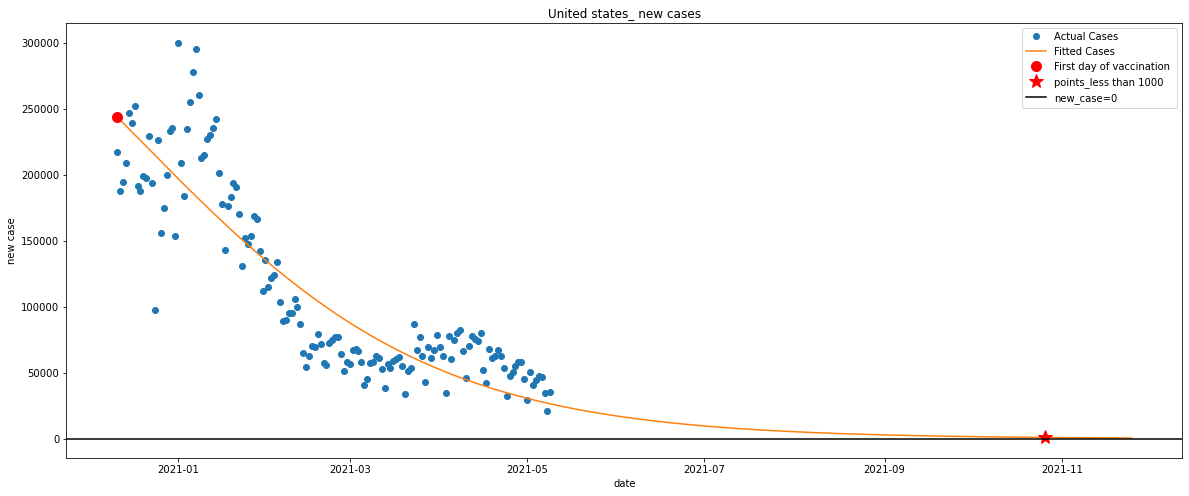

In [72]:

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(date1 , y, 'o', label ='Actual Cases')
ax.plot(date2, yfit, '-', label ='Fitted Cases')

j=319
j1=0

ax.plot(date2[j1],yfit[j1]  , "o",color='red',markersize=10, label="First day of vaccination ")
ax.plot(date2[j],yfit[j]  , "*",color='red',markersize=14, label="points_less than 1000 ")
ax.title.set_text('United states_ new cases')
plt.axhline(y=0, color='black', linestyle='-', label='new_case=0')
plt.ylabel("new case")
plt.xlabel("date")
plt.legend(loc="upper right")
plt.show()

In [14]:
k1[232],yfit[225]

(datetime.date(2021, 7, 31), 6224.855712136843)

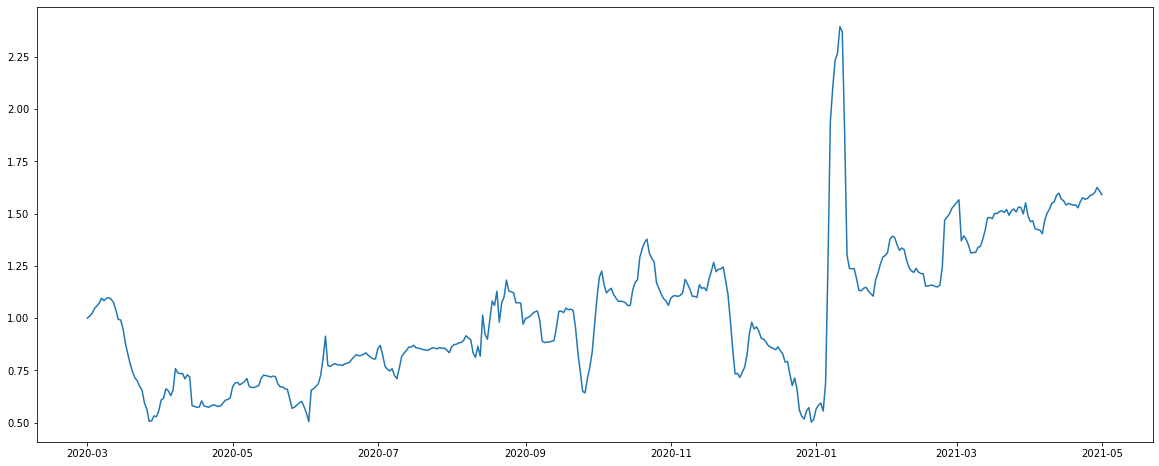

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.plot(result2['date'], result2['count_id_indexed'], '-', label ='count_id_indexed')